## Italy Unemployment Data Forecasting using ARIMA

In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [90]:
# Read csv file
df = pd.read_csv("Italy_unemployment_rate_monthly.csv")


df

,Date,Unemployment Rate
0,1/2010,8.3
1,2/2010,8.5
2,3/2010,8.6
3,4/2010,8.5
4,5/2010,8.8
...,...,...
120,1/2020,9.7
121,2/2020,9.8
122,3/2020,9.8
123,4/2020,9.7


In [91]:
# Convert to Date datatype
df['Date'] = pd.to_datetime(df['Date'])

df = df.set_index('Date')
df.index


DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01',
               ...
               '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
               '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
               '2020-04-01', '2020-05-01'],
              dtype='datetime64[ns]', name='Date', length=125, freq=None)

In [92]:
y = df['Unemployment Rate'].resample('MS').mean()

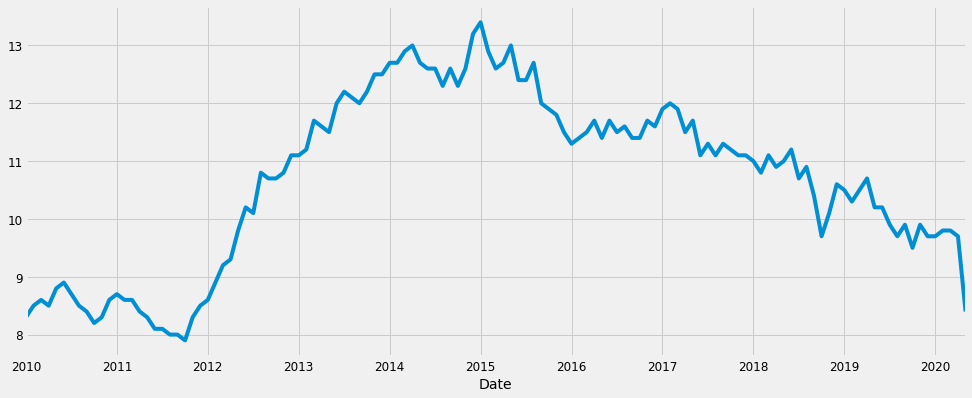

In [93]:
y.plot(figsize=(15, 6))
plt.show()

In [94]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [95]:
# Print the combination of p,d,q for the lowest AIC
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:944.6854969745832
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:740.0483480811845
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:350.06236770198285
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:311.79184421147227
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:354.12262080871403
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:340.67934522820457
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:313.7879406123282
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:308.27725074068496
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:775.303845425776
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:737.3549303838934
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:251.43464989301643
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:234.01709021079276
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:256.74047131955535
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:253.49677105744271
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:237.6089739212733
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:234.47092366419463
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:49.89286711706822
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:54.5220033258027
AR

In [96]:
# ARIMA with (0,0,0,12) is chosen with the lowest AIC
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:      Unemployment Rate   No. Observations:                  125
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 -23.890
Date:                Fri, 08 May 2020   AIC                             53.780
Time:                        00:26:58   BIC                             62.192
Sample:                    01-01-2010   HQIC                            57.197
                         - 05-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0294      1.274     -0.023      0.982      -2.527       2.468
ma.L1         -0.0475      1.292     -0.037      0.971      -2.579       2.484
sigma2         0.0866      0.008     11.365      0.0

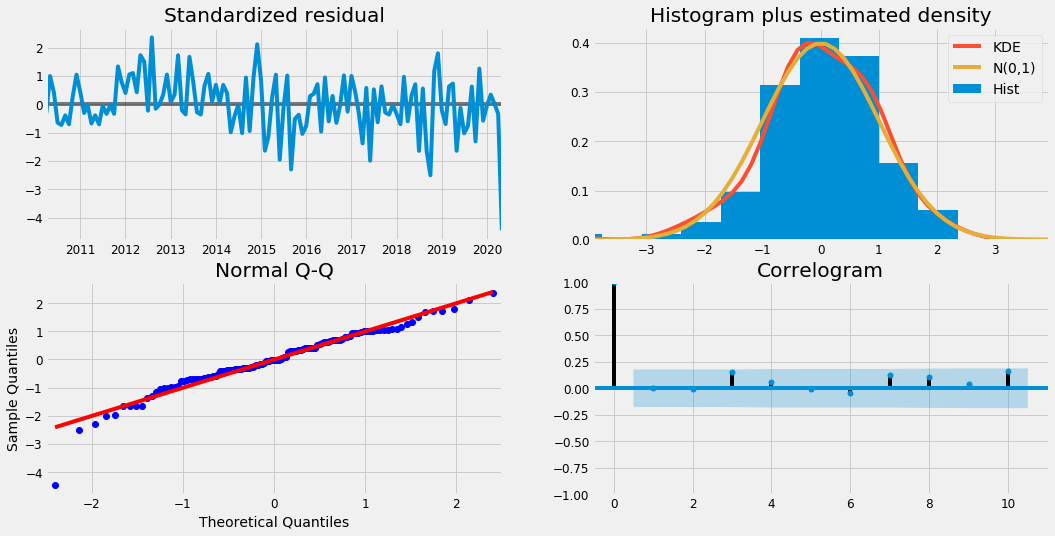

In [97]:
# Display diagnostics
results.plot_diagnostics(figsize=(16, 8))
plt.show()

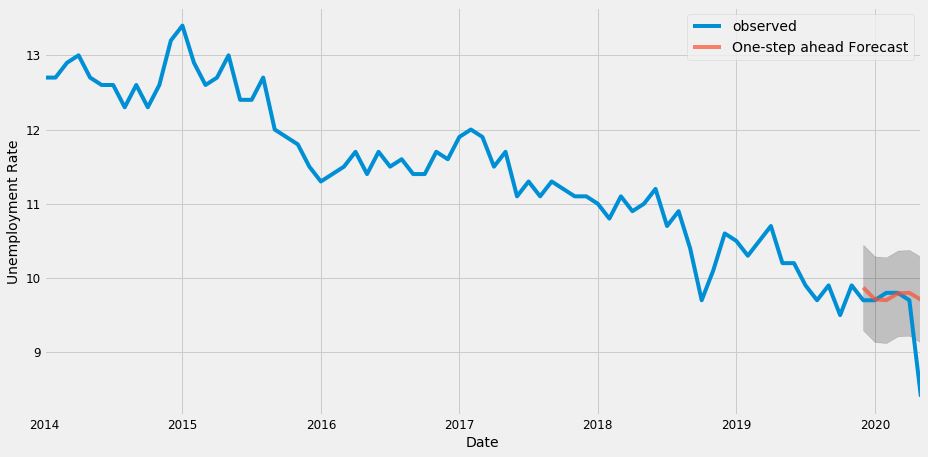

                               SARIMAX Results                                
Dep. Variable:      Unemployment Rate   No. Observations:                  125
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 -23.890
Date:                Fri, 08 May 2020   AIC                             53.780
Time:                        00:27:15   BIC                             62.192
Sample:                    01-01-2010   HQIC                            57.197
                         - 05-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0294      1.274     -0.023      0.982      -2.527       2.468
ma.L1         -0.0475      1.292     -0.037      0.971      -2.579       2.484
sigma2         0.0866      0.008     11.365      0.0

In [98]:
# Get the predictions
pred = results.get_prediction(start=pd.to_datetime('2019-12-01'), dynamic=False)

# Prediction in the confidence interval
pred_ci = pred.conf_int()

ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Unemployment Rate')
plt.legend()

plt.show()

print(results.summary())

In [83]:
# Forecasted values comparison
y_forecasted = pred.predicted_mean
y_truth = y['2020-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

print("r2_score:" , r2_score(y_truth, y_forecasted))

forecast_errors = [y_truth[i]-y_forecasted[i] for i in range(len(y_truth))]
#print('Forecast Errors: %s' % forecast_errors)
mean_forecast_error = np.mean(forecast_errors)
print('mean forecast Errors: %s' % mean_forecast_error)

bias = sum(forecast_errors) * 1.0/len(y_truth)
print('Bias: %f' % bias)

mse = mean_squared_error(y_forecasted, y_truth)
print('MSE: %f' % mse)



The Mean Squared Error of our forecasts is 0.2674
r2_score: -0.6483629589276603
mean forecast Errors: 0.29948791415949555
Bias: 0.299488
MSE: 0.267401


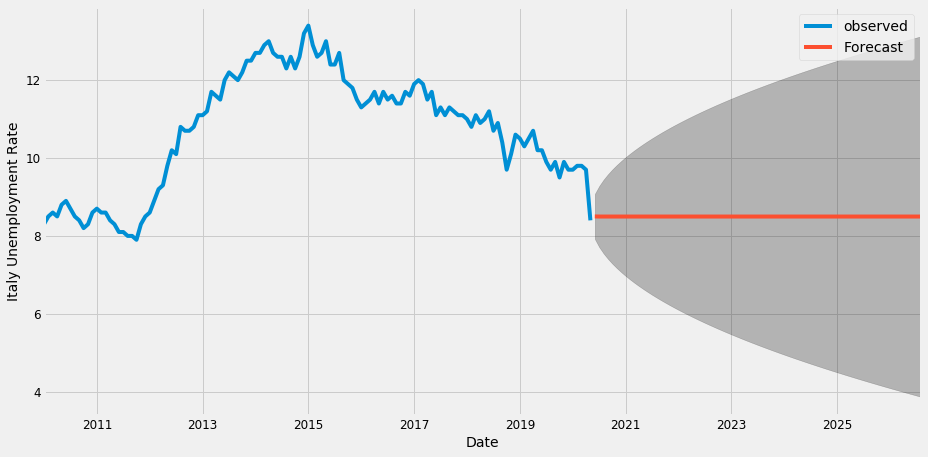

In [100]:
# Plot forecast values for next 75 steps

pred_uc = results.get_forecast(steps=75)

pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Italy Unemployment Rate')

plt.legend()
plt.show()